In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import numpy as np
import pandas as pd
DataFile=pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames - Full.csv")

In [48]:
print(DataFile)
print('Giới tính nam',int(DataFile[DataFile.Gender==1].size/2))
print('Giới tính nữ',int(DataFile[DataFile.Gender==0].size/2))
print('Điểm dữ liệu',len(DataFile))
print('giá trị Null', DataFile.isnull().sum())

                  Full_Name  Gender
0             Ngô Xuân Tùng       1
1         Bùi Dương Thảo Vy       0
2               Lưu Thế Huy       1
3            Nguyễn Thị Vân       0
4           Dương Minh Long       1
...                     ...     ...
26846      Đoàn Thị Bảo Thu       0
26847            Ôn Hoa Thu       1
26848  Nguyễn Thị Huỳnh Như       0
26849  Nguyễn Thị Hồng Phúc       0
26850         Dương Mỹ Uyên       0

[26851 rows x 2 columns]
Giới tính nam 15495
Giới tính nữ 11356
Điểm dữ liệu 26851
giá trị Null Full_Name    0
Gender       0
dtype: int64


In [ ]:
DataFile.describe()

,Gender
count,26851.000000
mean,0.577073
std,0.494033
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
File_Train=pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames - Train.csv")
File_Test=pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames-Test.csv")
File_Dev= pd.read_csv("/content/drive/MyDrive/DoAnMayHoc/UIT-ViNames/UIT-ViNames - Dev.csv")

In [ ]:
print(len(File_Train)/len(DataFile))
print(len(File_Test)/len(DataFile))
print(len(File_Dev)/len(DataFile))

0.699973930207441
0.19999255148784031
0.10003351830471863


#Các hàm liên quan

In [ ]:
def Split_File(file):
  i =0
  file["First_Name"]=file["Mid_Name"]=file["Last_Name"]=file.Full_Name
  for FULL_NAME in file.Full_Name:
    Name=FULL_NAME
    Name_Split= Name.split()
    file.First_Name[i]=Name_Split[0]
    file.Mid_Name[i]=str(Name_Split[1:-1])
    file.Last_Name[i]=Name_Split[-1]
    i=i+1

In [ ]:
def CountFa_Names(Fa_Name): # đếm số Họ có trong Datafile.
  i =0
  for x in DataFile.First_Name:
    if str(x)==Fa_Name or str(x)==Fa_Name:
      i+=1
  print(i)


In [ ]:
import csv
def Out_CSV(Model,Name_out):# xuất file CSV những kết quả sai của mô hình, đầu vào là kết quả của mô hình sau khi dự đoán, tên file out.
  writer = csv.writer(open("/content/drive/MyDrive/DoAnMayHoc/"+str(Name_out)+".csv", 'w'))
  writer.writerow(["Full_Names","Gender_Predicted","Gender_True"])
  i=0
  for x in Model:
    if (x != File_Test.Gender[i]):
      writer.writerow([File_Test.Full_Names[i],x,File_Test.Gender[i]])
    i+=1

In [ ]:
def gender_trans(Model,name): # Dự đoán giới tính
    Name = [name]
    vector = cv.transform(Name).toarray()
    if Model.predict(vector) == 1:
        print("Giới Tính: Nam")
    else:
        print("Giới Tính: Nữ")

In [78]:
def lowertext(file):
  i=0
  for x in file.Full_Names:
    file.Full_Names[i]=x.lower()
    i+=1

#Chuẩn bị dữ liệu

In [ ]:
Split_File(DataFile)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
DataFile

,Full_Name,Gender,First_Name,Mid_Name,Last_Name
0,Ngô Xuân Tùng,1,Ngô,['Xuân'],Tùng
1,Bùi Dương Thảo Vy,0,Bùi,"['Dương', 'Thảo']",Vy
2,Lưu Thế Huy,1,Lưu,['Thế'],Huy
3,Nguyễn Thị Vân,0,Nguyễn,['Thị'],Vân
4,Dương Minh Long,1,Dương,['Minh'],Long
...,...,...,...,...,...
26846,Đoàn Thị Bảo Thu,0,Đoàn,"['Thị', 'Bảo']",Thu
26847,Ôn Hoa Thu,1,Ôn,['Hoa'],Thu
26848,Nguyễn Thị Huỳnh Như,0,Nguyễn,"['Thị', 'Huỳnh']",Như
26849,Nguyễn Thị Hồng Phúc,0,Nguyễn,"['Thị', 'Hồng']",Phúc


In [79]:
lowertext(File_Train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [100]:
File_Train

,Full_Names,Gender
0,ngô xuân tùng,1
1,bùi dương thảo vy,0
2,lưu thế huy,1
3,nguyễn thị vân,0
4,dương minh long,1
...,...,...
18790,trần nguyễn tường vy,0
18791,phan hải âu,1
18792,phạm trương trúc phương,0
18793,nguyễn diệu hiền,0


In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(File_Train.Full_Names)
y_train = File_Train.Gender
X_test = cv.transform(File_Test.Full_Names)
y_test = File_Test.Gender

In [82]:
# hiển thị một số thông tin về dữ liệu 
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (18795, 1292) (18795,)
Dữ liệu testing =  (5370, 1292) (5370,)


#Mô hình

## NB

In [83]:
from sklearn.naive_bayes import MultinomialNB
#train
print("- Training ...")
model_NB = MultinomialNB()
model_NB.fit(X_train,y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [ ]:
print("- Predict ...")
Pre_NB=model_NB.predict(X_test)

- Predict ...


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("Accuracy: " + str(accuracy_score(y_test, Pre_NB)))
print("Precision: " + str(precision_score(y_test, Pre_NB)))
print("Recall: " + str(recall_score(y_test, Pre_NB)))
print("F1-micro: " + str(f1_score(y_test, Pre_NB)))
print("F1-macro: " + str(f1_score(y_test, Pre_NB, average='macro')))
cf = confusion_matrix(y_test, Pre_NB)


Accuracy: 0.9493482309124768
Precision: 0.9558584875040571
Recall: 0.9558584875040571
F1-micro: 0.9558584875040571
F1-macro: 0.948221947989687


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_NB,digits=4)) 

              precision    recall  f1-score   support

           0     0.9406    0.9406    0.9406      2289
           1     0.9559    0.9559    0.9559      3081

    accuracy                         0.9493      5370
   macro avg     0.9482    0.9482    0.9482      5370
weighted avg     0.9493    0.9493    0.9493      5370



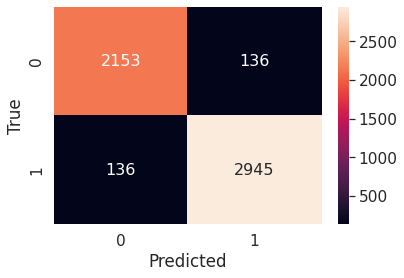

In [ ]:
from sklearn.metrics import confusion_matrix

matrix_clf = confusion_matrix(y_test, Pre_NB)
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(font_scale=1.4) 
sn.heatmap(matrix_clf, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
Out_CSV(Pre_NB,"outNB")

In [ ]:
gender_trans(model_NB,"H'Hen Niê")

Giới Tính: Nữ


##SVM và GridSearchCV

In [ ]:
from sklearn import svm
print("- Training ...")
model_SVM = svm.SVC()
model_SVM.fit(X_train, y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [ ]:
print("- Predict ...")
Pre_SVM=model_SVM.predict(X_test)

- Predict ...


In [ ]:
print("Accuracy: " + str(accuracy_score(y_test, Pre_SVM)))
print("Precision: " + str(precision_score(y_test, Pre_SVM)))
print("Recall: " + str(recall_score(y_test, Pre_SVM)))
print("F1-micro: " + str(f1_score(y_test, Pre_SVM)))
print("F1-macro: " + str(f1_score(y_test, Pre_SVM, average='macro')))
cf = confusion_matrix(y_test, Pre_SVM)

Accuracy: 0.9530726256983241
Precision: 0.9469194312796209
Recall: 0.9727361246348588
F1-micro: 0.9596541786743515
F1-macro: 0.9517897061596057


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_SVM,digits=4)) 

              precision    recall  f1-score   support

           0     0.9619    0.9266    0.9439      2289
           1     0.9469    0.9727    0.9597      3081

    accuracy                         0.9531      5370
   macro avg     0.9544    0.9497    0.9518      5370
weighted avg     0.9533    0.9531    0.9529      5370



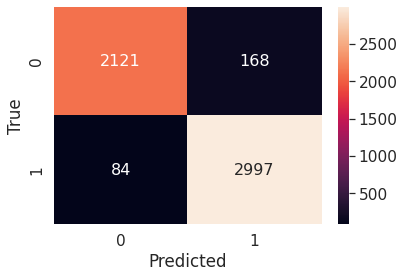

In [ ]:
matrix_svm = confusion_matrix(y_test, Pre_SVM)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_svm, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV # link tham khảo:https://cafedev.vn/tu-hoc-ml-dieu-chinh-sieu-tham-so-svm-bang-gridsearchcv-ml/
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10,100],  
              'gamma': [1, 0.1, 0.01,0.001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(model_SVM, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=  16.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=  17.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time=  17.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.848 total time=  12.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=  14.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   7.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.904 total time=   8.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.903 total time=  10.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=   9.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=  10.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.841 total time=  12.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print("Thông số tốt nhất:",grid.best_params_) 
print("Công cụ ướng tính tốt nhất:",grid.best_estimator_) 

Thông số tốt nhất: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Công cụ ướng tính tốt nhất: SVC(C=100, gamma=0.01)


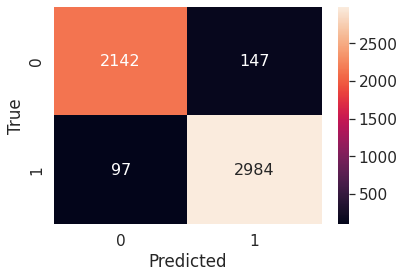

In [ ]:
matrix_svm = confusion_matrix(y_test, predictions)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_svm, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
#Tinh chỉnh siêu thông số
print("- Training ...")
model_best_SVM = svm.SVC(C=100, gamma=0.01, kernel= 'rbf')
model_best_SVM.fit(X_train, y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [51]:
print("- Predict ...")
Pre_best_SVM=model_best_SVM.predict(X_test)

- Predict ...


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_best_SVM,digits=4)) 

              precision    recall  f1-score   support

           0     0.9567    0.9358    0.9461      2289
           1     0.9531    0.9685    0.9607      3081

    accuracy                         0.9546      5370
   macro avg     0.9549    0.9521    0.9534      5370
weighted avg     0.9546    0.9546    0.9545      5370



In [72]:
gender_trans(model_best_SVM,"Nguyễn Ngọc Thủy")

Giới Tính: Nữ


##Logistic regression

In [84]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [85]:
print("- Training ...")
model_Lg = LogisticRegression()
model_Lg.fit(X_train, y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [86]:
print("- Predict ...")
Pre_Lg=model_Lg.predict(X_test)

- Predict ...


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
print("Accuracy: " + str(accuracy_score(y_test, Pre_Lg)))
print("Precision: " + str(precision_score(y_test, Pre_Lg)))
print("Recall: " + str(recall_score(y_test, Pre_Lg)))
print("F1-micro: " + str(f1_score(y_test, Pre_Lg)))
print("F1-macro: " + str(f1_score(y_test, Pre_Lg, average='macro')))
cf = confusion_matrix(y_test, Pre_Lg)

Accuracy: 0.9547486033519553
Precision: 0.9504761904761905
Recall: 0.9717624148003895
F1-micro: 0.9610014443909485
F1-macro: 0.9535546144110431


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_Lg,digits=4)) 

              precision    recall  f1-score   support

           0     0.9608    0.9318    0.9461      2289
           1     0.9505    0.9718    0.9610      3081

    accuracy                         0.9547      5370
   macro avg     0.9556    0.9518    0.9536      5370
weighted avg     0.9549    0.9547    0.9547      5370



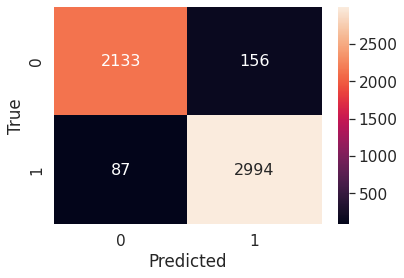

In [89]:
matrix_lg = confusion_matrix(y_test, Pre_Lg)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_lg, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')  
plt.show()

In [90]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [91]:
clf = RandomizedSearchCV(model_Lg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [92]:
best_model_Lg = clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [93]:
print('Penalty tốt nhất:', best_model_Lg.best_estimator_.get_params()['penalty'])
print('C tốt nhất:', best_model_Lg.best_estimator_.get_params()['C'])

Penalty tốt nhất: l2
C tốt nhất: 1.5103373646043785


In [94]:
#Tinh Chỉnh Siêu Tham Số
print("- Training ...")
model_best_Lg = LogisticRegression(C= 1.5103373646043785,penalty= 'l2')
model_best_Lg.fit(X_train, y_train)
print("- model - train complete")

- Training ...
- model - train complete


In [95]:
Pre_best_Lg=model_best_Lg.predict(X_test)

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_best_Lg,digits=4)) 

              precision    recall  f1-score   support

           0     0.9604    0.9336    0.9468      2289
           1     0.9517    0.9714    0.9615      3081

    accuracy                         0.9553      5370
   macro avg     0.9561    0.9525    0.9541      5370
weighted avg     0.9554    0.9553    0.9552      5370



In [102]:
gender_trans(model_best_Lg,"Nguyễn Minh Quân")

Giới Tính: Nam


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
print("- Training ...")
model_KNN = KNeighborsClassifier(n_neighbors=6)
model_KNN.fit(X_train, y_train)
print("- model - train complete")

In [ ]:
print("- Predict ...")
Pre_KNN= model_KNN.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test, Pre_KNN)))
print("Precision: " + str(precision_score(y_test, Pre_KNN)))
print("Recall: " + str(recall_score(y_test, Pre_KNN)))
print("F1-micro: " + str(f1_score(y_test, Pre_KNN)))
print("F1-macro: " + str(f1_score(y_test, Pre_KNN, average='macro')))
cf = confusion_matrix(y_test, Pre_KNN)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_KNN,digits=4)) 

In [ ]:
matrix_knn = confusion_matrix(y_test, Pre_KNN)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_knn, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)

#check top performing n_neighbors value
print("Best parameter: {}".format(knn_gscv.best_params_))

#check the best score
print("Best score: {}".format(knn_gscv.best_score_))

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print("- Training ...")
model_DT = DecisionTreeClassifier(random_state=0,max_depth=65)
model_DT.fit(X_train,y_train)
print("- model - train complete")

In [ ]:
print("- Predict ...")
Pre_DT = model_DT.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy: " + str(accuracy_score(y_test, Pre_DT)))
print("Precision: " + str(precision_score(y_test, Pre_DT)))
print("Recall: " + str(recall_score(y_test, Pre_DT)))
print("F1-micro: " + str(f1_score(y_test, Pre_DT)))
print("F1-macro: " + str(f1_score(y_test, Pre_DT, average='macro')))
cf = confusion_matrix(y_test, Pre_DT)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Pre_DT,digits=4)) 

In [ ]:
matrix_DT = confusion_matrix(y_test, Pre_DT)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_DT, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
matrix_DT = confusion_matrix(y_test, Pre_DT)
sn.set(font_scale=1.4) 
sn.heatmap(matrix_DT, annot=True, annot_kws={"size": 16}, fmt='d') 

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()